In [1]:
import re,json
import pandas as pd
import pymysql,gc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dana_data.csv')
df.loc[df.late_days<0,'late_days'] = 0
df = df.loc[~df.late_days.isna()]

In [3]:
df.head()

,aku_uid,sim_auth_phone_num,auth_is_emulator,auth_is_root,sim_auth_device_num,education_level_x,working_periods,occupation_x,if_ip_in_black,sim_related_idcard_danaid_cnt,...,features_incr_total_session,features_incr_total_action_rate,features_incr_total_page_action_rate,features_incr_avg_w9,features_incr_std_w9,features_incr_total_w2_15d,features_incr_total_w2_7d,features_incr_total_w2_3d,features_incr_total_w2_7d_div_15d,late_days
0,22266562,1,0,0,1,4,3,3,-1,1.0,...,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0000,2.0
3,1295397,1,0,0,1,5,0,1,0,1.0,...,714.0,24.0587,22.8434,507675.190311,596111.311290,4764.0,1272.0,534.0,0.2669,0.0
4,11183062,1,0,0,1,1,0,1,0,1.0,...,0.0,0.0000,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.0
6,15242414,1,0,0,1,5,1,2,0,1.0,...,392.0,34.2494,28.0687,386927.061856,504929.181400,1050.0,364.0,84.0,0.3463,0.0
9,14162810,1,0,0,1,1,4,3,0,1.0,...,286.0,12.6829,14.6585,147614.483146,232926.283323,407.0,64.0,34.0,0.1569,0.0


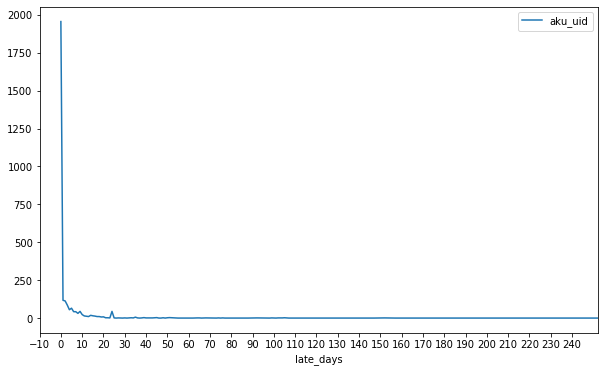

In [4]:
df[['aku_uid','late_days']].groupby('late_days').count().plot(kind='line',
                                                              figsize=(10,6),
                                                              xticks=[ i for i in range(-10,250,10)],
                                                              fontsize=10)

In [5]:
x = [ i for i in range(0,91)]
y = []
for i in x:
    y.append(sum(df.late_days>=i))

In [10]:
tmp = pd.DataFrame({'late_days':x,'bill_cnt':y})

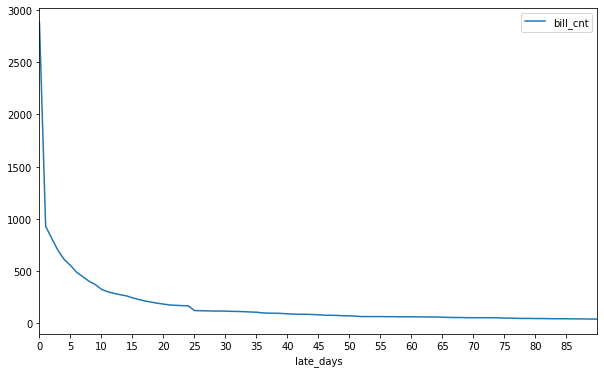

In [11]:
tmp.plot(x='late_days',y='bill_cnt',kind='line',figsize=(10,6),xticks=[ i for i in range(0,90,5)],fontsize=10)